# Silicon Band Gap Energy

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# We will use the scipy curve_fit function to fit a model to data.
from scipy.optimize import curve_fit

Enter data from table as numpy arrays

In [27]:
t_cel = np.array([-15., -10., -8., -6., -4.2, -2.3, 0., 2., 
                3.6, 5.8, 8.2, 10., 12.8, 16.2, 20.])
adu = np.array([13, 15, 16, 17, 19, 22, 24, 28, 32, 37, 
                43, 50, 62, 89, 139])

Convert Celsius to Kelvin

In [28]:
t_kel = t_cel+273.15

array([258.15, 263.15, 265.15, 267.15, 268.95, 270.85, 273.15, 275.15,
       276.75, 278.95, 281.35, 283.15, 285.95, 289.35, 293.15])

Convert ADU (counts) to electrons

In [29]:
electrons = 2.3*adu

array([ 29.9,  34.5,  36.8,  39.1,  43.7,  50.6,  55.2,  64.4,  73.6,
        85.1,  98.9, 115. , 142.6, 204.7, 319.7])

Convert electrons to electrons per second

In [30]:
electrons_per_sec = electrons/120

array([0.24916667, 0.2875    , 0.30666667, 0.32583333, 0.36416667,
       0.42166667, 0.46      , 0.53666667, 0.61333333, 0.70916667,
       0.82416667, 0.95833333, 1.18833333, 1.70583333, 2.66416667])

## Plot dark current (e-/sec) vs. inverse temperature
Make a plot in the cell below

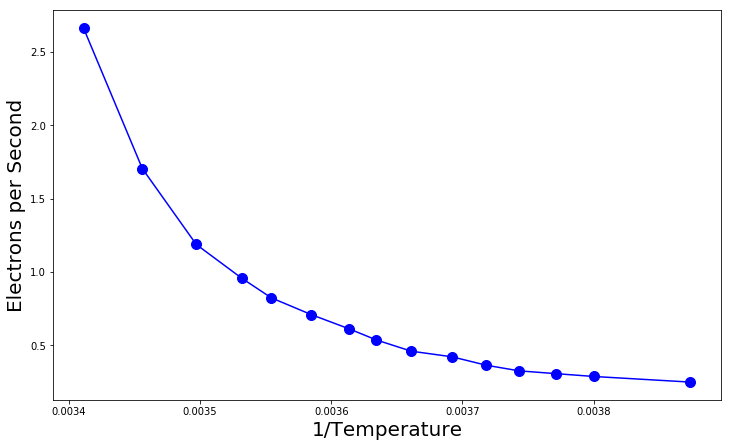

In [56]:
fig, ax = plt.subplots(1,1)     
fig.set_size_inches(10,6)

fig.tight_layout()

y = electrons_per_sec
temp = 1/t_kel


ax.set_ylabel("Electrons per Second", size = 20)
ax.set_xlabel("1/Temperature", size = 20)

ax.plot(temp,y,color="b",marker="o",markersize=10);

## Fit for the band gap energy
We will try to fit a model for dark current of the form

$D = \alpha e^{-e_g/2k_bT}$

In [43]:
# The Boltzmann constant
k_b = 8.6175e-5

def dark_current(t_k, alpha, e_g):
    """
    Analytic expression for dark current as a function of temperature.
    
    Parameters
    ----------
    t_k : numpy.ndarray
        Temperature in Kelvin
    alpha : float
        Constant coefficient in front of exponential funtion.
    e_g : float
        Band gap energy in eV.
    
    Returns
    -------
    dark_current : numpy.ndarray
        Dark current in electrons/pixel/second.
    """
    dark_current = alpha * np.exp(-e_g / (2 * k_b * t_k))
    return dark_current

## Inital guesses for parameters
We need initial guesses for the values of $\alpha$ and $e_g$.

In [44]:
t_0 = t_kel[-1]
d_0 = electrons_per_sec[-1]

alpha_0 =  d_0 / np.exp(-1.1 / (2 * k_b * t_0))
e_g_0 = 1.1

## Least squares fit

In [45]:
p_opt, p_cov = curve_fit(dark_current, t_kel, electrons_per_sec, p0=[alpha_0, e_g_0])

# Errors in the fit
sig_alpha, sig_e_g = np.sqrt(np.diag(p_cov))

## Best fit values

In [46]:
alpha_fit, e_g_fit = p_opt
print(alpha_fit)
print(e_g_fit)

77098910165.43013
1.2205226843061665


## Plot the data and best fit model

Make a plot in the cell below. To plot the model, use the `dark_current` function with `alpha_fit` and `e_g_fit`.

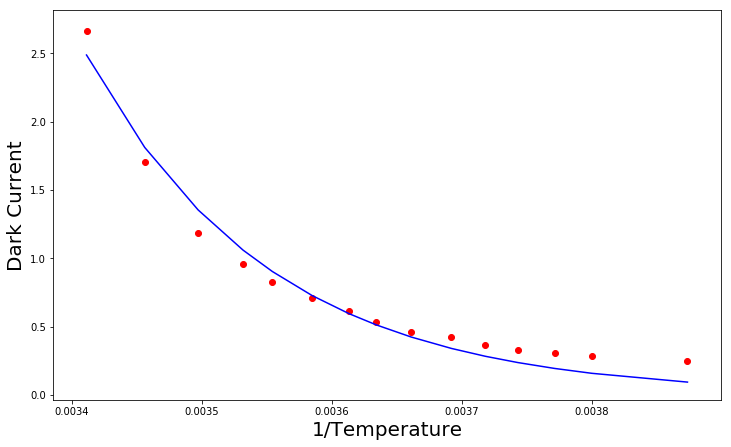

In [63]:
fig, ax = plt.subplots(1,1)     
fig.set_size_inches(10,6)

fig.tight_layout()


ax.set_ylabel("Dark Current", size = 20)
ax.set_xlabel("1/Temperature", size = 20)

ax.plot((1 / t_kel), dark_current(t_kel, alpha_fit, e_g_fit), color='blue');

plt.scatter((1 / t_kel), electrons_per_sec, color='r');

In [66]:
alpha_final = (24 * 2.3 / 120) / np.exp(-1.1 / (2 * k_b * 273))
e_g_final = e_g_0
print(dark_current(273, alpha_final, e_g_final))

0.45999999999999996
